# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [34]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

df = pd.read_csv('winequality_edited.csv')
df.tail()

,alcohol,chlorides,citric_acid,color,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity,acidity_levels
6492,10.5,0.090,0.08,red,0.99490,6.2,32.0,3.45,5,2.0,0.58,44.0,0.600,low
6493,11.2,0.062,0.10,red,0.99512,5.9,39.0,3.52,6,2.2,0.76,51.0,0.550,low
6494,11.0,0.076,0.13,red,0.99574,6.3,29.0,3.42,6,2.3,0.75,40.0,0.510,low
6495,10.2,0.075,0.12,red,0.99547,5.9,32.0,3.57,5,2.0,0.71,44.0,0.645,low
6496,11.0,0.067,0.47,red,0.99549,6.0,18.0,3.39,6,3.6,0.66,42.0,0.310,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [35]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

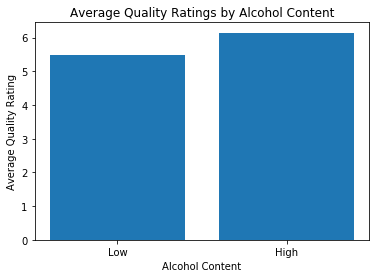

In [36]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [37]:
# Use query to select each group and get its mean quality
sug_med = df['residual_sugar'].median()
sug_low = df.query('residual_sugar < {}'.format(sug_med))
sug_high = df.query('residual_sugar >= {}'.format(sug_med))

sug_low_qual_mean = sug_low['quality'].mean()
sug_high_qual_mean = sug_high['quality'].mean()


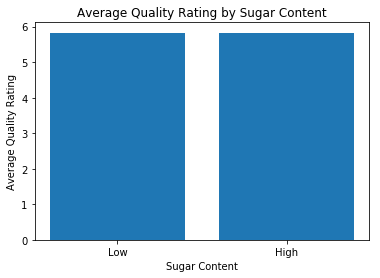

In [38]:
# Create a bar chart with proper labels
locs = [1,2]
sug_heights = [sug_low_qual_mean, sug_high_qual_mean]
sug_labels = ["Low","High"]
plt.bar(locs,sug_heights,tick_label=sug_labels)
plt.title("Average Quality Rating by Sugar Content")
plt.xlabel("Sugar Content")
plt.ylabel("Average Quality Rating");


### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [39]:
# Use groupby to get the mean quality for each acidity level
acidity = df.groupby('acidity_levels')['quality'].mean()
acidity


acidity_levels
high        5.783469
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

(5.5, 6.0)

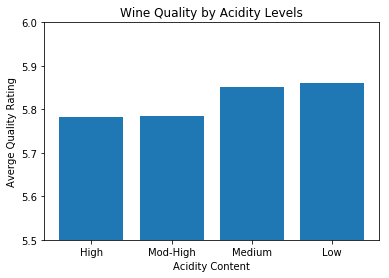

In [48]:
#### Create a bar chart with proper labels
acid_loc =[1,2,3,4]
acid_heights =[acidity.high,acidity.mod_high,acidity.medium,acidity.low]
acid_labels =['High','Mod-High','Medium','Low']
plt.bar(acid_loc,acid_heights,tick_label=acid_labels)
plt.title("Wine Quality by Acidity Levels")
plt.xlabel("Acidity Content")
plt.ylabel('Averge Quality Rating')
plt.ylim(5.5,6.0)


### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

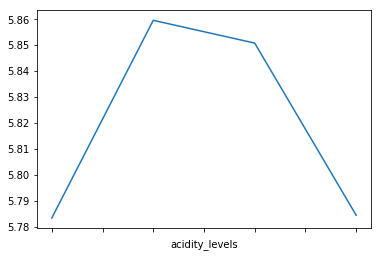

In [54]:
acidity.plot()

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?